In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.grid_tools as gt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg
import scipy.optimize as sopt
#%config InlineBackend.figure_formats = ['svg']

ModuleNotFoundError: No module named 'pydae'

In [2]:
%matplotlib widget

In [3]:
import smib_vsc_pq

## Steady state

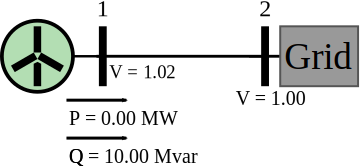

In [11]:
model = smib_vsc_pq.model()
params = {'p_in_1':1.0,'Dp_r_1':-1.0,'Dq_r_1':1.0}
model.ini(params,'xy_0.json')
#grid.report_x()
#grid.report_y()
sgrid = svg('smib_vsc_pq.svg')
sgrid.set_text('V_1',f"V = {model.get_value('V_1'):2.2f}")
sgrid.set_text('V_2',f"V = {model.get_value('V_2'):2.2f}")
S_n_1 = model.get_value('S_n_1')
sgrid.set_text('p_out_1_MW',  f"P = {S_n_1*model.get_value('p_out_1')/1e6:2.2f} MW")
sgrid.set_text('q_out_1_Mvar',f"Q = {S_n_1*model.get_value('q_out_1')/1e6:2.2f} Mvar")

SVG(sgrid.tostring())

In [13]:
import ipywidgets as widgets

sld_p_in_vsc = widgets.FloatSlider(orientation='horizontal',description = "p (MW)", 
                                value=0, min=0,max= 10,step=1,continuous_update=False)
sld_Dp_r_vsc = widgets.FloatSlider(orientation='horizontal',description = "Δp (MW)", 
                                value=0, min=-10,max= 0,step=1,continuous_update=False)
sld_Dq_r_vsc = widgets.FloatSlider(orientation='horizontal',description = "Δq (Mvar)", 
                                value=0, min=-10,max= 10,step=1,continuous_update=False)

html_grid = widgets.HTML(sgrid.tostring())
S_n_1 = grid.get_value('S_n_1')

#gt.change_line(grid,'1','2', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.1)   
gt.change_line(grid,'1','2', X_km=0.0529,R_km=0.529,Bs_km=2.1e-6,km=5.0)   


def update(change):
    #options=['VSC R10-S10','VSC R14-S14','VSC I02-H02','VSC C16-D16','VSC C09-D09'],
    S_n_1 = grid.get_value('S_n_1')
    
    grid.set_value('p_in_1',1e6*sld_p_in_vsc.value/S_n_1)

    grid.set_value('Dp_r_1',1e6*sld_Dp_r_vsc.value/S_n_1)
    grid.set_value('Dq_r_1',1e6*sld_Dq_r_vsc.value/S_n_1)
    
    grid.ini({})
    #gt_grid = gt.grid(grid)
    #grid.report_u()

    sgrid.set_text('V_1',f"V = {grid.get_value('V_1'):2.2f}")
    sgrid.set_text('V_2',f"V = {grid.get_value('V_2'):2.2f}")
    S_n_1 = grid.get_value('S_n_1')
    sgrid.set_text('p_out_1_MW',f"P = {S_n_1*grid.get_value('p_out_1')/1e6:2.2f} MW")
    sgrid.set_text('q_out_1_Mvar',f"Q = {S_n_1*grid.get_value('q_out_1')/1e6:2.2f} Mvar")

    
    html_grid.value = sgrid.tostring()
 
update(0)

sld_p_in_vsc.observe(update, names='value')
sld_Dp_r_vsc.observe(update, names='value')
sld_Dq_r_vsc.observe(update, names='value')

layout_row1 = widgets.HBox([sld_p_in_vsc])
layout_row2 = widgets.HBox([html_grid])
layout_row3 = widgets.HBox([sld_Dp_r_vsc,sld_Dq_r_vsc])

layout = widgets.VBox([layout_row1,layout_row2,layout_row3])
layout

U_base 20000.0 Z_base 4.0
4.2e-05


## Time domain simulation

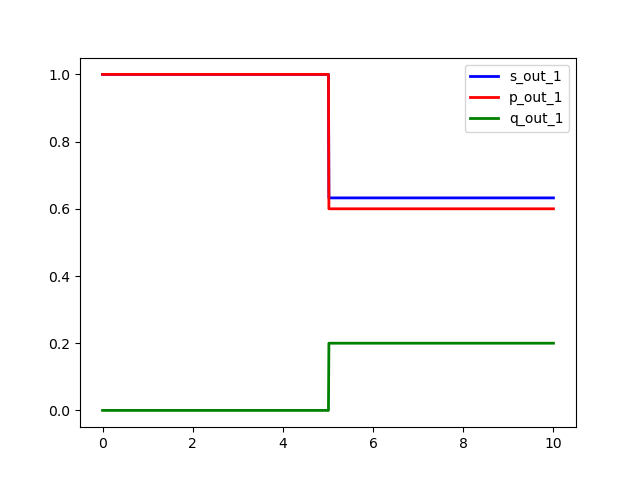

In [38]:
grid = smib_vsc_pq.model()
grid.Dt = 0.01
grid.decimation = 1

grid.ini(params,'xy_0.json')
grid.run( 1.0,{})
grid.run(5.0,{'Dq_r_1': 0.2})
grid.run(10.0,{'Dp_r_1':-0.4})
grid.post();

fig,axes = plt.subplots()

#axes.plot(grid.Time,grid.get_values('V_1'),lw=2,color='r')
#axes.plot(grid.Time,grid.get_values('V_2'),lw=2,color='g')
p = grid.get_values('p_out_1')
q = grid.get_values('q_out_1')
s = p +1j*q
axes.plot(grid.Time,np.abs(s),lw=2,color='b',label='s_out_1')
axes.plot(grid.Time,p,lw=2,color='r',label='p_out_1')
axes.plot(grid.Time,q,lw=2,color='g',label='q_out_1')

#axes.plot(grid.Time,grid.get_values('v_f_2'),lw=2,color='g')
#axes.plot(grid.Time,grid.get_values('omega_coi'),lw=2,color='b')

axes.legend()

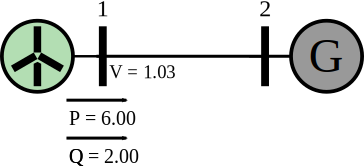

In [8]:
# VSG1 --- G2 ----L3 G3


grid_vsg  = milano_8p1_vsg_1_class()
gt.change_line(grid_vsg,'1','2', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.1)   
gt.change_line(grid_vsg,'2','3', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=1.0)  

grid_uvsg = milano_8p1_uvsg_1_class()   
gt.change_line(grid_uvsg,'1','2', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.1)   
gt.change_line(grid_uvsg,'2','3', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=1.0)  

xy_0_dict = {"V_1":1.0,"V_2":1.0,"V_3":1.0,"p_g_1":1.0}

Omega_b = 2*np.pi*50
K_p = 0.01
H = 5.0
T_p = 2*H*K_p
K_i = K_p/T_p

S_n_1 = 1.0e8
S_n_2 = 1.0e8
S_n_3 = 1.0e9

grid_vsg.initialize([{'Dt':0.01,'decimation':10,'R_a_2':0.01,
                      'S_n_1':S_n_1,'K_delta_1':0.0,'p_src_1':0.8,'T_i_1':0.02,'soc_ref_1':0.5,'K_i_soc_1':-1e-4,'K_p_soc_1':-1e-5,
                      'D1_1':0,'D2_1':10.0,'D3_1':K_p*Omega_b,"T_wo_1":0.5,
                      'K_q_1':0.01,'H_1':5.0,'R_v_1':0.0,'X_v_1':0.3,'H_s_1':0.7,
                      'S_n_2':S_n_2,'Droop_2':1e6,'p_c_2':0.8,'K_sec_2':0.0,
                      'S_n_3':S_n_3,'H_3':5.0,
                      }],xy_0_dict,compile=True)

grid_uvsg.initialize([{'Dt':0.01,'decimation':1,
                      'S_n_1':S_n_1,'K_delta_1':0.0,'p_m_1':0.8,'T_i_1':0.02,'K_p_1':K_p,'K_i_1':K_i,
                      'S_n_2':S_n_2,'Droop_2':1e6,
                      'S_n_3':S_n_3,'H_3':5.0,
                 }],xy_0_dict,compile=True)


grid_vsg.report_y()

ssa.eval_A(grid_vsg)
damp = ssa.damp_report(grid_vsg)
damp.sort_values('Damp')

NameError: name 'milano_8p1_vsg_1_class' is not defined

In [8]:
#grid_vsg.simulate( [{'t_end':1.0,'p_m_1':0.8},{'t_end':15.0,'p_m_1':0.8}],xy_0_dict)
#grid_uvsg.simulate([{'t_end':1.0,'p_m_1':0.8},{'t_end':15.0,'p_m_1':0.8}],xy_0_dict)

grid_vsg.simulate( [{'t_end':1.0,'p_src_1':0.8,'P_3':0.0},{'t_end':200.0,'P_3':-200e6}],xy_0_dict)
grid_uvsg.simulate([{'t_end':1.0,'p_m_1':0.8},{'t_end':15.0,'P_3':-200e6}],xy_0_dict)
fig,axes = plt.subplots()

axes.plot(grid_vsg.T,grid_vsg.get_values('omega_v_1'),lw=0.3,color='r')
axes.plot(grid_vsg.T,grid_vsg.get_values('omega_2'),lw=0.3,color='g')
axes.plot(grid_vsg.T,grid_vsg.get_values('omega_3'),lw=0.3,color='b')


axes.plot(grid_vsg.T,grid_vsg.get_values('omega_coi'),label='vsg')
axes.plot(grid_uvsg.T,grid_uvsg.get_values('omega_coi'),label='uvsg')


axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_g_1_1'),label='vsg')
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_g_2_1'),label='Syn')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_soc_1'),label='soc_1')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
def simu(grid):
    grid.Dt = 0.05
    grid.struct[0]['Dt'] = 0.05
    grid.struct[0]['t'] = 0.0
    grid.struct[0]['it'] = 0
    grid.set_value('P_3',0.0)
    grid.ss()
    grid.run([{'t_end':1.0}])
    grid.run([{'t_end':25,'P_3':-200.0e6}])
    grid.post();
%timeit simu(grid_vsg)

148 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [161]:
grid_vsg.Dt

0.001

In [162]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('omega_v_1'),label='vsg')
axes.plot(grid_vsg.T,  grid_vsg.get_values('omega_2'),label='Syn')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [158]:
ssa.eval_A(grid)
damp = ssa.damp_report(grid)
damp.sort_values('Damp')

,Real,Imag,Freq.,Damp
Mode 20,8.521606e-03,0.000000,0.000000,-1.000000
Mode 5,7.315788e-01,22.442514,3.571837,-0.032581
Mode 6,7.315788e-01,-22.442514,3.571837,-0.032581
Mode 9,-4.060753e-01,8.696893,1.384154,0.046641
Mode 10,-4.060753e-01,-8.696893,1.384154,0.046641
Mode 18,-1.577423e-01,-0.478974,0.076231,0.312807
Mode 17,-1.577423e-01,0.478974,0.076231,0.312807
Mode 1,-1.000000e-01,0.000000,0.000000,1.000000
Mode 25,-1.000000e-02,0.000000,0.000000,1.000000
Mode 24,-1.015166e-08,0.000000,0.000000,1.000000


In [20]:
ssa.participation(grid).abs().round(1)['Mode 5']

delta_2      0.0
omega_2      0.0
e1q_2        3.8
e1d_2        0.0
v_c_2        3.8
xi_v_2       0.0
x_gov_1_2    0.0
x_gov_2_2    0.0
xi_imw_2     0.0
delta_3      0.0
omega_3      0.0
e1q_3        4.2
e1d_3        0.0
v_c_3        4.2
xi_v_3       0.0
x_gov_1_3    0.0
x_gov_2_3    0.0
xi_imw_3     0.0
xi_freq      0.0
delta_1      0.0
omega_v_1    0.0
x_wo_1       0.0
i_d_1        0.0
i_q_1        0.0
xi_q_1       0.0
Name: Mode 5, dtype: float64

In [67]:
Δt = 0.02  # latencia del control (cada cuanto se ejecuta el controlador)
times = np.arange(0,30,Δt)   # tiempos para los cuales se ejecutará el control 
                             # (en este caso la simulación sera de 15 s)

grid = milano_8p1_vsg_1_class()
   
gt.change_line(grid,'1','2', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.1)   
gt.change_line(grid,'2','3', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.5)  
xy_0_dict = {"V_1":1.0,"V_2":1.0,"V_3":1.0,"p_g_1":1.0}

K_p = 0.01
H = 5.0
T_p = 2*H*K_p
K_i = K_p/T_p

grid.initialize([{'S_n_3':1e9,'Dt':0.01,'decimation':1,
                  'S_n_2':1e9,'Droop_2':1e6,
                  'H_3':5.0,'K_q_1':0.01,
                  'S_n_1':1e7,'K_delta_1':0.0,'p_m_1':0.8,'T_i_1':0.02,#'K_p_1':K_p,'K_i_1':K_i,
                   'D1_1':0,'D2_1':0,'D3_1':5,"T_wo_1":2.0
                 }],
                   xy_0_dict,compile=True)

e_v_1_0   = grid.get_value('e_v_1')
q_g_1_1_0 = grid.get_value('q_g_1_1')
p_m_1_0 = grid.get_value('p_m_1') 

it = 0
for t in times:
    
    # perturbaciones o cambios de referencia
    P_3 = 0.0
    q_ref = 0.0
    p_m = p_m_1_0
    if t>1.0: # se aplica un cambio para t = 1 s 
        #p_m = 1.2*p_m_0  # se propone como nuevo valor de potencia de un 20% más que el valor inicial
        P_3 = 00e6
        q_ref = 0.0
        p_m = 1.0
    
    # measurements
   # omega_2 = grid.get_value('omega_2')
    omega_3 = grid.get_value('omega_3')
    

    
    # se actualiza v_f y se ejecuta la simulación para el nuevo tiempo t    
    events=[{'t_end':t,'P_3':P_3,'q_ref_1':q_ref, 'p_m_1':p_m}]
    grid.run(events)
    
    it += 1

grid.post();

U_base 20000.0 Z_base 4.0
8.4e-07
U_base 20000.0 Z_base 4.0
4.2e-06


In [68]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_v_1'),label='omega_1')
axes.plot(grid.T,grid.get_values('omega_2'),label='omega_2')
#axes.plot(grid.T,grid.get_values('omega_coi'),label='omega_coi')

axes.plot(grid.T,grid.get_values('omega_3'),label='omega_3')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('p_g_1_1'),label='p_g_1')

axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [70]:
H = 5
fig,axes = plt.subplots()
#axes.plot(grid.T[0:-1],-2*H*np.diff(grid.get_values('omega_2'))/0.01,label='inertia')
axes.plot(grid.T,grid.get_values('p_g_1_1')-grid.get_values('p_g_1_1')[0],label='p_g_1')
axes.plot(grid.T,grid.get_values('p_g_2_1')-grid.get_values('p_g_2_1')[0],label='p_g_2')

axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
H = 6.0
K_p = 0.1
K_i = K_p/(2*H)

Omega_b = 2*np.pi*50
D3_1 = K_p*Omega_b
D3_1

31.415926535897935

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

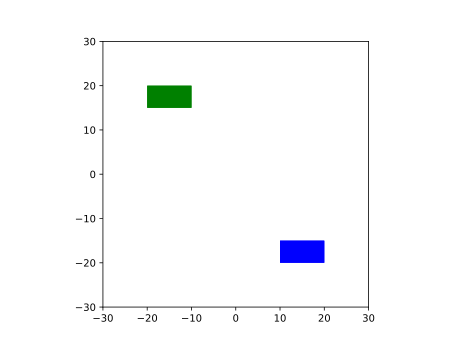

In [32]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from io import BytesIO

ET.register_namespace("", "http://www.w3.org/2000/svg")

fig, ax = plt.subplots()

# Create patches to which tooltips will be assigned.
rect1 = plt.Rectangle((10, -20), 10, 5, fc='blue')
rect2 = plt.Rectangle((-20, 15), 10, 5, fc='green')

shapes = [rect1, rect2]
labels = ['This is a blue rectangle.', 'This is a green rectangle']

for i, (item, label) in enumerate(zip(shapes, labels)):
    patch = ax.add_patch(item)
    annotate = ax.annotate(labels[i], xy=item.get_xy(), xytext=(0, 0),
                           textcoords='offset points', color='w', ha='center',
                           fontsize=8, bbox=dict(boxstyle='round, pad=.5',
                                                 fc=(.1, .1, .1, .92),
                                                 ec=(1., 1., 1.), lw=1,
                                                 zorder=1))

    ax.add_patch(patch)
    patch.set_gid('mypatch_{:03d}'.format(i))
    annotate.set_gid('mytooltip_{:03d}'.format(i))

# Save the figure in a fake file object
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_aspect('equal')

f = BytesIO()
plt.savefig(f, format="svg");

# --- Add interactivity ---

# Create XML tree from the SVG file.
tree, xmlid = ET.XMLID(f.getvalue())
tree.set('onload', 'init(event)')

for i in shapes:
    # Get the index of the shape
    index = shapes.index(i)
    # Hide the tooltips
    tooltip = xmlid['mytooltip_{:03d}'.format(index)]
    tooltip.set('visibility', 'hidden')
    # Assign onmouseover and onmouseout callbacks to patches.
    mypatch = xmlid['mypatch_{:03d}'.format(index)]
    mypatch.set('onmouseover', "ShowTooltip(this)")
    mypatch.set('onmouseout', "HideTooltip(this)")

# This is the script defining the ShowTooltip and HideTooltip functions.
script = """
    <script type="text/ecmascript">
    <![CDATA[

    function init(event) {
        if ( window.svgDocument == null ) {
            svgDocument = event.target.ownerDocument;
            }
        }

    function ShowTooltip(obj) {
        var cur = obj.id.split("_")[1];
        var tip = svgDocument.getElementById('mytooltip_' + cur);
        tip.setAttribute('visibility', "visible")
        }

    function HideTooltip(obj) {
        var cur = obj.id.split("_")[1];
        var tip = svgDocument.getElementById('mytooltip_' + cur);
        tip.setAttribute('visibility', "hidden")
        }

    ]]>
    </script>
    """

# Insert the script at the top of the file and save it.
tree.insert(0, ET.XML(script))
ET.ElementTree(tree).write('svg_tooltip.svg');
SVG('svg_tooltip.svg')

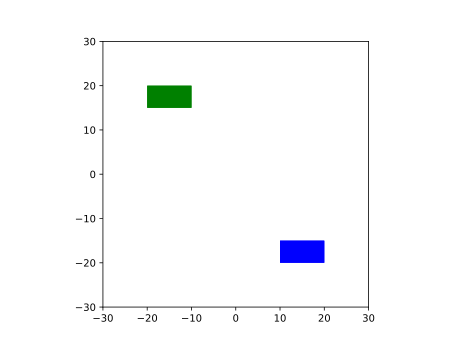

In [13]:
SVG('svg_tooltip.svg')